### Задание
Команда маркетологов решила организовать флешмоб в ленте новостей: участники должны сделать пост, где они рассказывают какой-то интересный факт о себе, и опубликовать его с хэштегом. Три поста, собравших наибольшее число лайков, получают призы.

Флешмоб проходил с 2024-04-12 по 2024-04-18, задача – оценить эффективность этого мероприятия.

1. Предположить, какие метрики должны были измениться во время флешмоба и как, почему? Выдвинуть хотя бы 5 метрик.
2. Проверить с помощью CausalImpact, реально ли эти метрики изменились. Если изменение действительно произошло, то описать, как именно изменилась метрика и насколько.
3. Имел ли флешмоб какие-то долгосрочные эффекты? Сделать выводы и аргументировать их.

### Рассуждение
Я думаю, что должны были измениться следующие метрики:
- **Количество постов** - должно было возрасти, потому что многие люди захотели выиграть призы. 
- **Количество лайков** - должно было увеличиться, поскольку люди просили своих друзей/родственников/одногруппников и прочих знакомых поставить лайк на их пост, чтобы быть в топ-3 и забрать приз.
- **Количество просмотров** - должно было увеличиться, так как, во-первых, люди, желающие получить приз, рассылали свои пост всем, кого они знали, во-вторых, пользователи мониторили других участников флешмоба, чтобы, например, вдохновиться чужими идеями на свои посты, в-третьих, потому что постов просто стало больше.
- **Количество активных пользователей за день (DAU)** - должно возрасти, потому что, во-первых, участвующие во флешмобе мониторили лайки на своих постах, во-вторых, люди, которых попросили поставить лайк, переходили на пост, в-третьих, появились новые пользователи, желающие поучаствовать в этом мероприятии.
- **Среднее значение CTR** - должен увеличиться, поскольку люди буквально просили ставить лайки на их посты
   

In [233]:
import orbit 
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

import pandas as pd
import pandahouse
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az 

from causalimpact import CausalImpact

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [234]:
connection = { #здесь были параметры подключения
    'host': "...",
    'password': "...",
    'user': '...',
    'database': "..."
}

In [235]:
def get_flashmob(data):
    df = data.copy()
    df.set_index('date', inplace=True)
    fl = CausalImpact(data=df,
                      pre_period=[pd.Timestamp('2024-04-01'), pd.Timestamp('2024-04-11')], 
                      post_period=[pd.Timestamp('2024-04-12'), pd.Timestamp('2024-04-18')])
    return fl

In [236]:
query = """
        select date(time) as date, count(distinct post_id) as posts
        from {db}.feed_actions
        where date(time) <= date('2024-05-01')
        group by date 
"""
posts = pandahouse.read_clickhouse(connection=connection, query=query)

In [237]:
flashmob_posts = get_flashmob(posts)

2024-05-18 18:09:11.103289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:11.118564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:11.446070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:

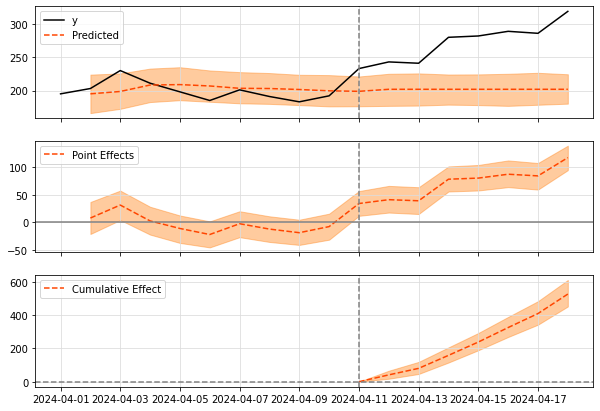

In [238]:
flashmob_posts.plot()

In [239]:
print(flashmob_posts.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    277.14             1940.0
Prediction (s.d.)         201.85 (5.7)       1412.94 (39.91)
95% CI                    [190.72, 213.07]   [1335.01, 1491.47]

Absolute effect (s.d.)    75.29 (5.7)        527.06 (39.91)
95% CI                    [64.08, 86.43]     [448.53, 604.99]

Relative effect (s.d.)    37.3% (2.82%)      37.3% (2.82%)
95% CI                    [31.74%, 42.82%]   [31.74%, 42.82%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [240]:
query = """
        select date(time) as date, count(action) as likes
        from {db}.feed_actions
        where action = 'like' and date(time) <= date('2024-05-01')
        group by date
"""
likes = pandahouse.read_clickhouse(connection=connection, query=query)

In [241]:
flashmob_likes = get_flashmob(likes)

2024-05-18 18:09:20.379082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:20.396885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:20.740972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:

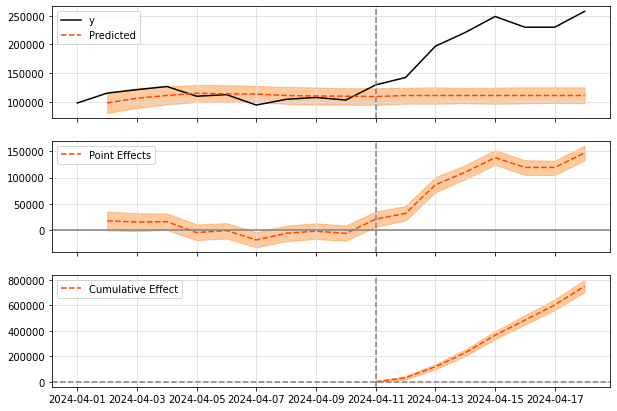

In [242]:
flashmob_likes.plot()

In [243]:
print(flashmob_likes.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    218090.14          1526631.0
Prediction (s.d.)         110772.8 (3235.84) 775409.56 (22650.84)
95% CI                    [104683.78, 117368.02][732786.45, 821576.14]

Absolute effect (s.d.)    107317.34 (3235.84)751221.44 (22650.84)
95% CI                    [100722.12, 113406.36][705054.86, 793844.55]

Relative effect (s.d.)    96.88% (2.92%)     96.88% (2.92%)
95% CI                    [90.93%, 102.38%]  [90.93%, 102.38%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [244]:
query = """
        select date(time) as date, count(action) as views
        from {db}.feed_actions
        where action = 'view' and date(time) <= date('2024-05-01')
        group by date
"""
views = pandahouse.read_clickhouse(connection=connection, query=query)

In [245]:
flashmob_views = get_flashmob(views)

2024-05-18 18:09:30.781007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:30.796335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:31.132871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:

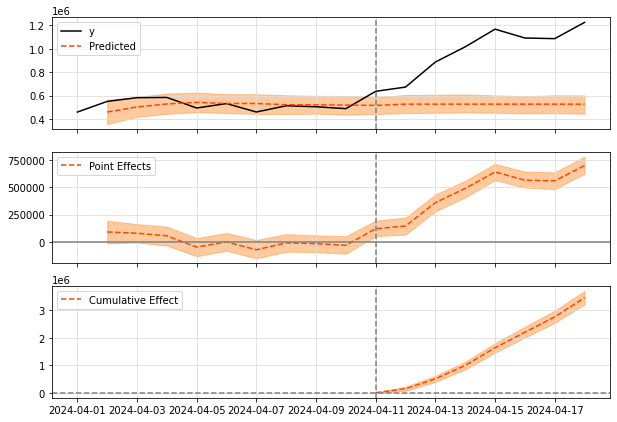

In [246]:
flashmob_views.plot()

In [247]:
print(flashmob_views.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1019947.31         7139631.0
Prediction (s.d.)         526551.06 (17935.09)3685857.25 (125545.66)
95% CI                    [491304.19, 561608.48][3439129.32, 3931259.35]

Absolute effect (s.d.)    493396.25 (17935.09)3453773.75 (125545.66)
95% CI                    [458338.83, 528643.12][3208371.65, 3700501.68]

Relative effect (s.d.)    93.7% (3.41%)      93.7% (3.41%)
95% CI                    [87.05%, 100.4%]   [87.05%, 100.4%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [248]:
query = """
        select date(time) as date, count(distinct user_id) as users
        from {db}.feed_actions
        where date(time) <= date('2024-05-01')
        group by date
"""
users = pandahouse.read_clickhouse(connection=connection, query=query)

In [249]:
flashmob_users = get_flashmob(users)

2024-05-18 18:09:40.135569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:40.150996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:40.488160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:

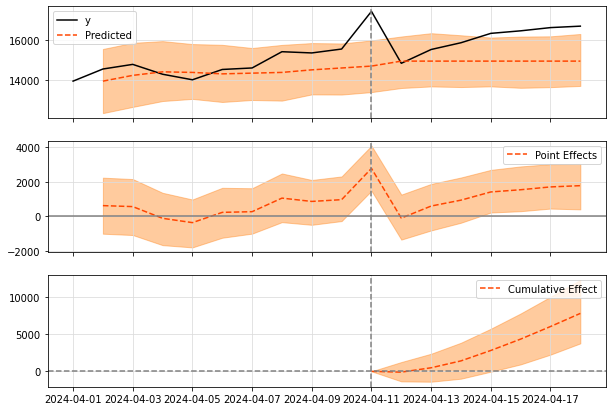

In [250]:
flashmob_users.plot()

In [251]:
print(flashmob_users.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16052.71           112369.0
Prediction (s.d.)         14938.73 (292.62)  104571.09 (2048.37)
95% CI                    [14350.2, 15497.27][100451.41, 108480.87]

Absolute effect (s.d.)    1113.99 (292.62)   7797.91 (2048.37)
95% CI                    [555.45, 1702.51]  [3888.13, 11917.59]

Relative effect (s.d.)    7.46% (1.96%)      7.46% (1.96%)
95% CI                    [3.72%, 11.4%]     [3.72%, 11.4%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [252]:
query = """
        select date, avg(ctr) as ctr
        from (select date(time) as date, sum(action='like')/sum(action='view') as ctr
              from {db}.feed_actions
              where date(time) <= date('2024-05-01')
              group by post_id, date)
        group by date
"""
ctrs = pandahouse.read_clickhouse(connection=connection, query=query)

In [253]:
flashmob_ctrs = get_flashmob(ctrs)

2024-05-18 18:09:49.640431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:49.655083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma/sample_1/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:09:49.985650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_joint_log_prob/sample/InverseGamma/sample/PartitionedCall}}]]
2024-05-18 18:

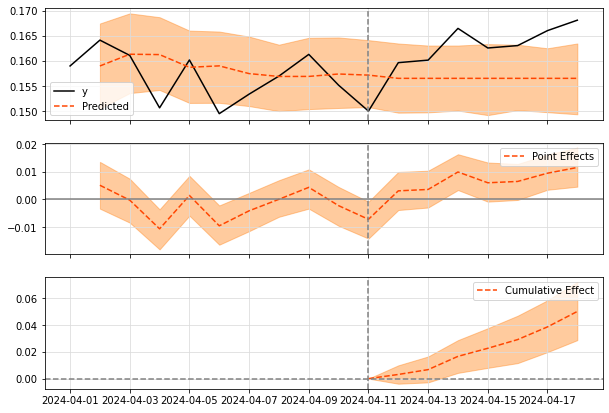

In [254]:
flashmob_ctr.plot()

In [255]:
print(flashmob_ctr.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.16               1.15
Prediction (s.d.)         0.16 (0.0)         1.1 (0.01)
95% CI                    [0.15, 0.16]       [1.07, 1.12]

Absolute effect (s.d.)    0.01 (0.0)         0.05 (0.01)
95% CI                    [0.0, 0.01]        [0.03, 0.07]

Relative effect (s.d.)    4.59% (1.01%)      4.59% (1.01%)
95% CI                    [2.63%, 6.61%]     [2.63%, 6.61%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


### Вывод об изменении метрик
Если посмотреть на графики количества постов, лайков, просмотров, а также DAU и CTR, то можно заметить, что реальные показатели в дни проведения флешмоба довольно сильно превышают предсказания, то есть флешмоб действительно «повысил» значения всех метрик. 

Причём, количество просмотров и лайков больше прогнозируемого на 93.69% и 96.92%, соответственно, это говорит о том, что флешмоб оказал влияние на людей и они больше постили и лайкали, количество постов больше прогнозируемого аж на 37.29%, то есть довольно много людей втянулись в данное мероприятие, метрика DAU тоже возросла, но не сильно, на 7.47%, с CTR получилось интереснее: в день начала флешмоба он был ниже прогнозируемого, а потом резко вырос и, в целом, на период флешмоба был выше ожидаемого на 4.59%.

### Проверим полученный эффект на долгосрочность

Для этого построим прогноз (как будто флешмба не было) и сравним с реальными данными после флешмоба. 

In [256]:
def get_DLT(name, data):
    dlt = DLT(response_col=name,
              date_col='date',
              seasonality=24,
              estimator='stan-map',
              n_bootstrap_draws=1000)
    before = data.query("date < '2024-04-12'")
    dlt.fit(before)
    future = dlt.make_future_df(periods=21)
    prediction = dlt.predict(df=future)
    _ = plot_predicted_data(data, 
                            prediction,
                            'date',
                            name, 
                            title=f'Prediction for {name}')

2024-05-18 18:10:57 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


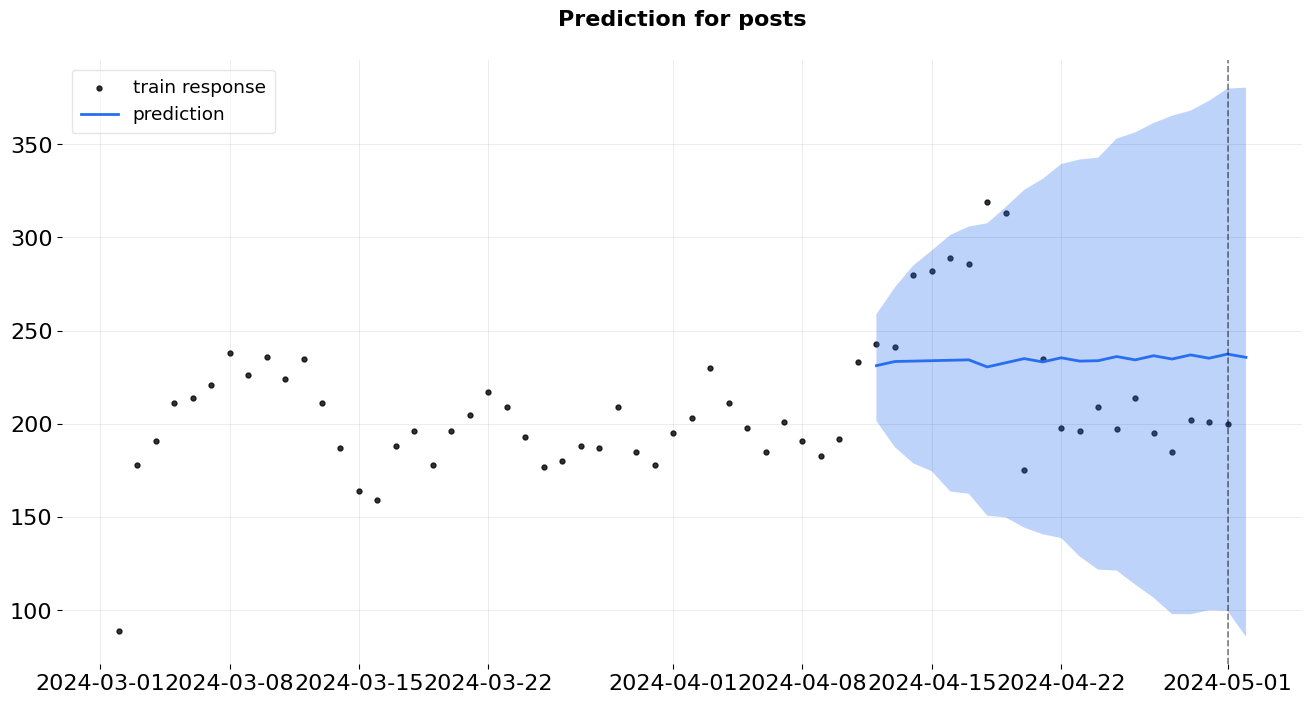

In [257]:
get_DLT('posts', posts)

2024-05-18 18:10:59 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


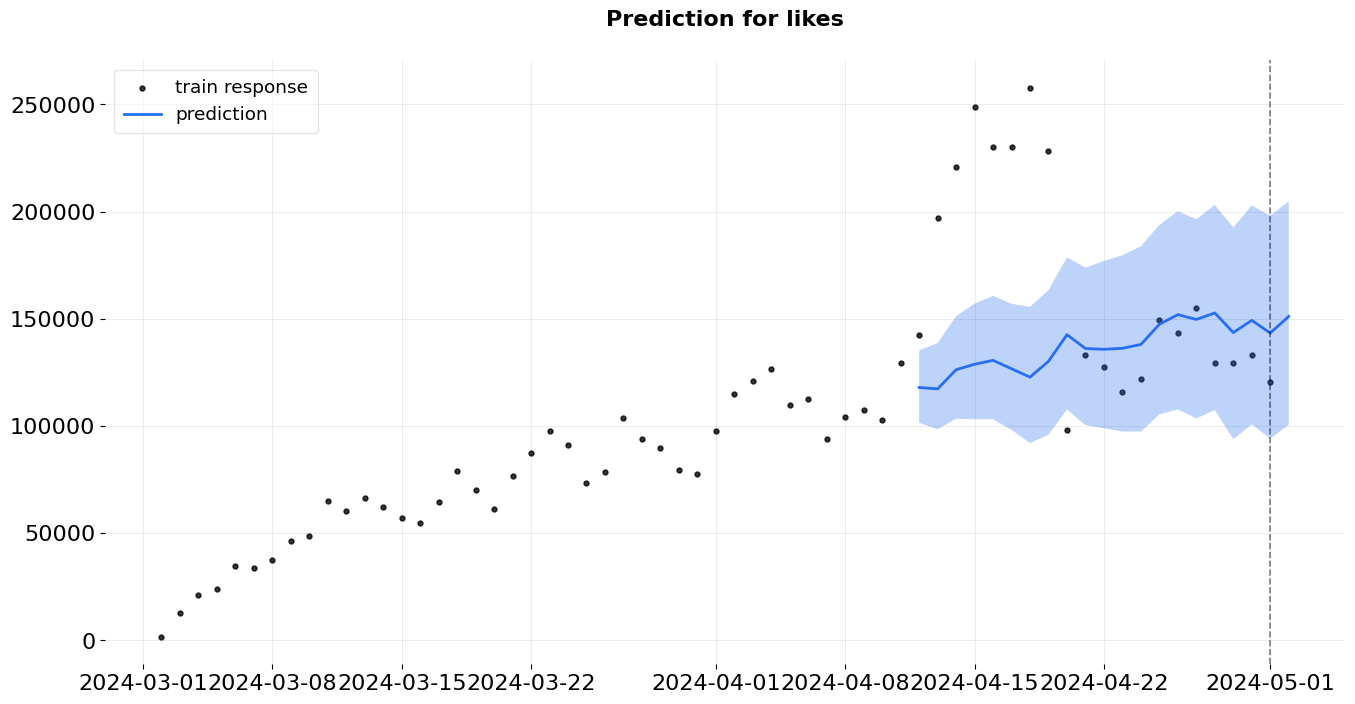

In [258]:
get_DLT('likes', likes)

2024-05-18 18:11:00 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


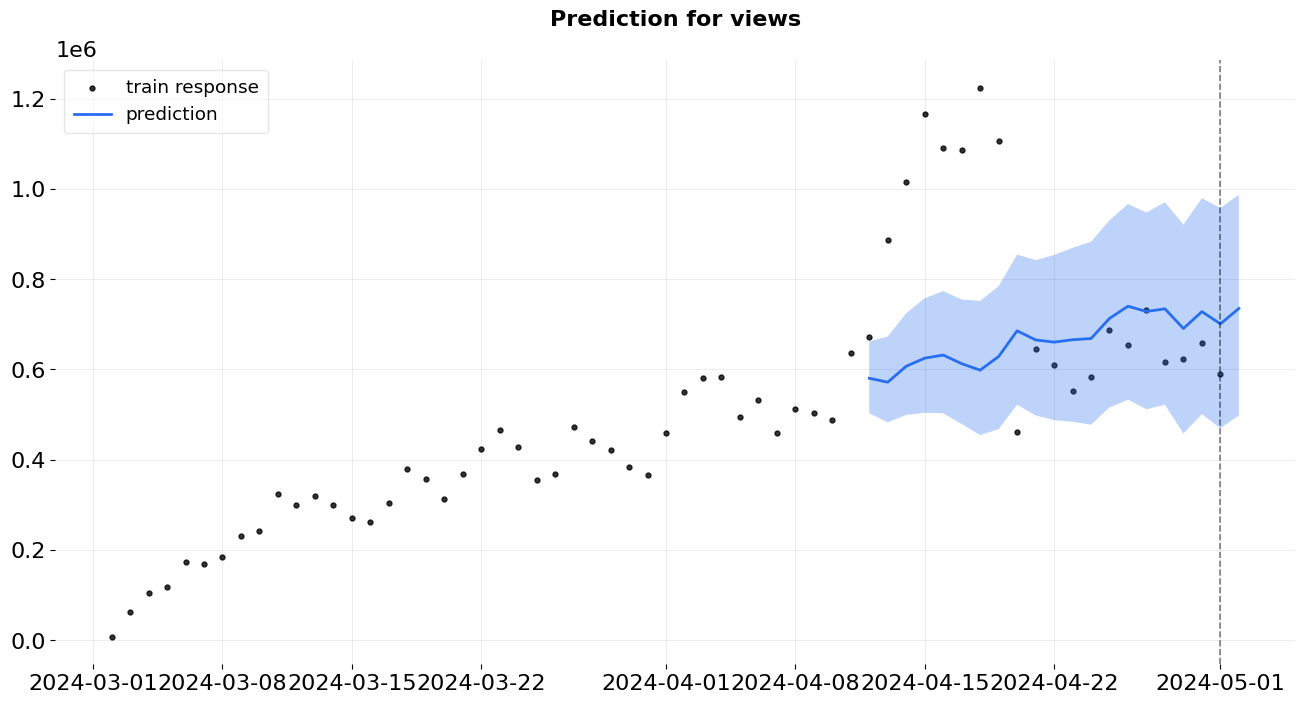

In [259]:
get_DLT('views', views)

2024-05-18 18:11:01 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


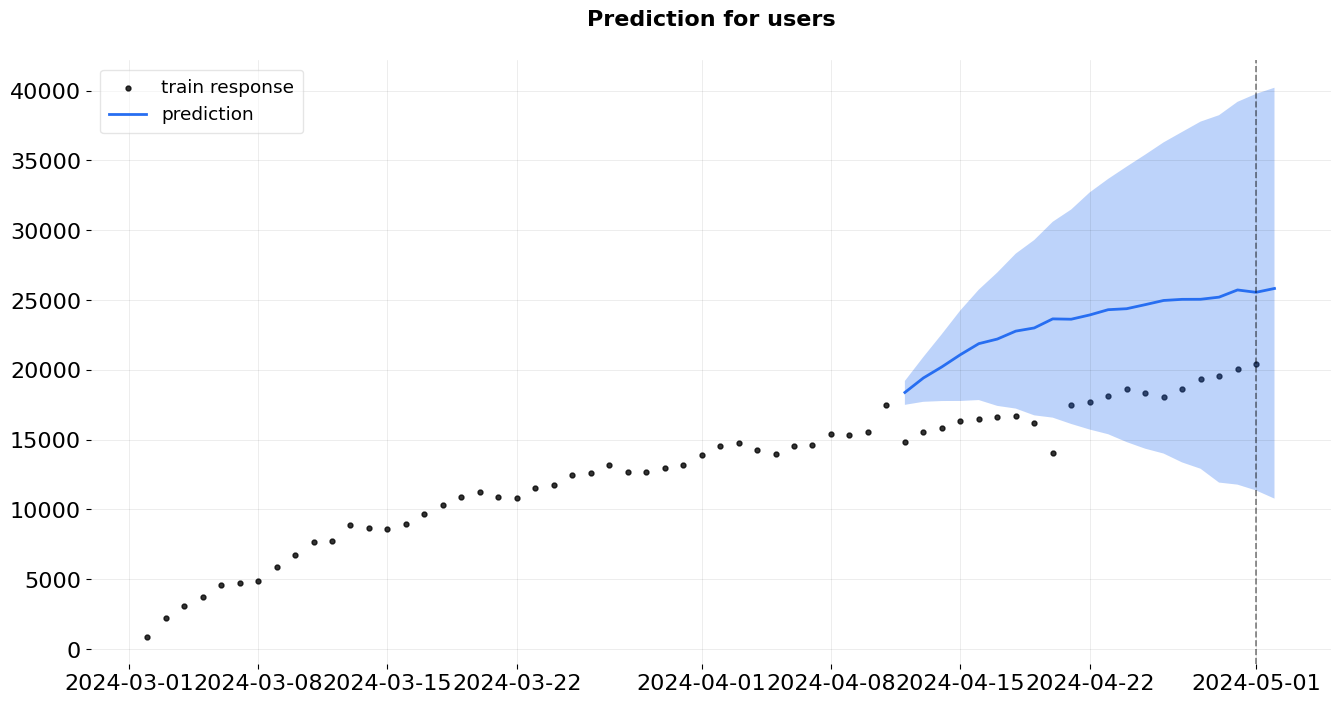

In [260]:
get_DLT('users', users)

2024-05-18 18:11:01 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.


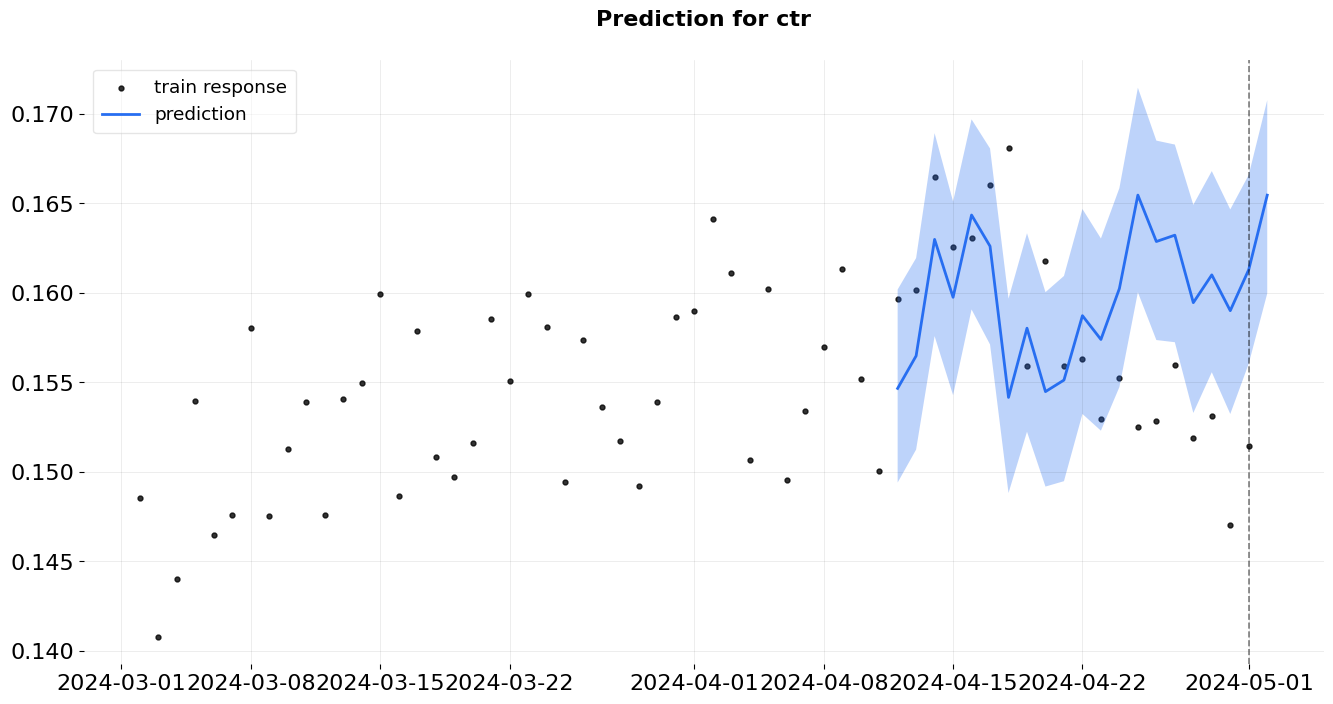

In [261]:
get_DLT('ctr', ctrs)

### Вывод о долгосрочных эффектах флешмоба

1. Количество постов после окончания флешмоба стало ниже, чем во время его проведения, причём показатели метрики даже ниже, чем предсказание, однако все значения попадают в доверительный интервал.
2. Количество лайков после окончания флешмоба также резко снизилось, но прогноз, который сделан при условии отсутствия флешмоба, довольно хорошо приближает значения метрики, однако количество лайков всё равно меньше прогнозируемого, хотя почти все значения попадают в доверительный интервал.
3. Ситуация с просмотрами аналогична ситуации с лайками: просмотров после флешмоба стало меньше, но прогноз, не учитывающий это мероприятие, всё так же хорошо аппроксимирует показатели.
4. Ситуация с DAU отличается от предыдущих показателей, это метрика, наоборот, выросла после флешмоба, возможно, потому что многим пользователям надоел флешмоб и обилие постов на определённую тему, и они решили дождаться его окончания, или флешмоб всё-таки привёл новых пользователей. У прогноза завышенные ожидания от DAU, такие, что значения во время проведения флешмоба не попали даже в доверительный интервал.
5. CTR после окончания мероприятия резко упал, причём так, что он ниже прогноза и не попадает в доверительный интервал предсказания, в котором предполагается, что флешмоба не было.

### Вывод
Проанализировав значения метрик во время и после флешмоба, можно сделать вывод, что данное мероприятие не поспособствовало увеличению количества постов/лайков/просмотров или CTR, показатели этих метрик возросли лишь на время его проведения. Метрика DAU возросла, но другие примерно такие же, что и до флешмоба, лишь чуть хуже по сравнению с прогнозом модели, не учитывающей проведение флешмоба.